In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import (GradientBoostingRegressor , RandomForestRegressor,
                              BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor)
import sklearn.model_selection as ms

# Sections

- <a href="#Examination">Examination</a><br>
- <a href="#Sort">Sort Features</a><br>
- <a href="#N">Notes</a><br>
- <a href="#Replace">Replace NaNs</a><br>
- <a href="#Focus">Features to Focus on</a><br>
- <a href="#MLR">Multiple Linear Regression</a><br>
- <a href="#Turn">Turn Categorical into Dummy Values</a><br>
- <a href="#Test">Test Data</a><br>
- <a href="#Testing">Run MLR</a><br>

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Finding the Total Square Footage of the house
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [4]:
#Dropping the SF of the Basement, 1st Floor and 2nd Floor
train.drop('TotalBsmtSF', axis = 1, inplace = True)
train.drop('1stFlrSF', axis = 1, inplace = True)
train.drop('2ndFlrSF', axis = 1, inplace = True)

<p><a name="Examination"></a></p>

# Examination

These were columns we think deserve some close examination.

- Month Sold
- 1 vs 2 Story
- Duplex
- PUD: involves having an HOA. More specific for Single Family Homes, Condos, Commercial Real Estate
- Quality[Overall, Heating, Exterior, Basement]
                  vs
- Condition[Overall, Heating, Exterior, Basement]
- Year Built[House, Garage]
            vs
- Year Remodel[House, Garage]
- Central Air Conditioning
- Heating
- Electrical
- Pool
- Extra Features
- Lot Area
- Lot Frontage
- MS Zoning

In [5]:
train[train['BsmtFullBath']>1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
188,189,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
454,455,90,RL,63.0,9297,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,188000
588,589,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Partial,143000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


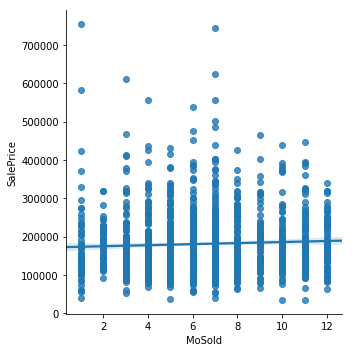

In [6]:
sns.lmplot('MoSold', 'SalePrice', train)

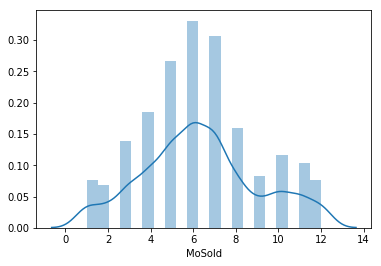

In [7]:
sns.distplot(train['MoSold'])

Text(0, 0.5, 'Sale Price')

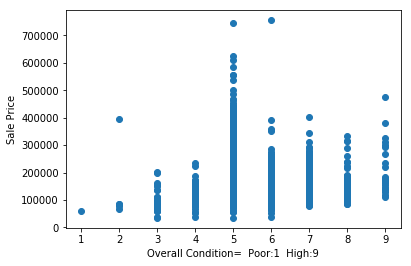

In [8]:
plt.scatter(x=train['OverallCond'],y=train['SalePrice'])
plt.xlabel('Overall Condition=  Poor:1  High:9')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

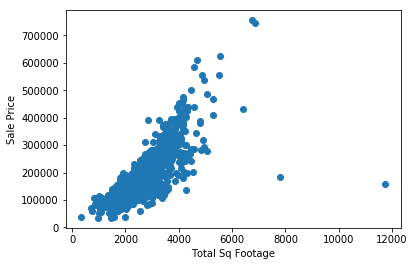

In [11]:
plt.scatter(x=train['TotalSF'], y=train['SalePrice'])
plt.xlabel('Total Sq Footage')
plt.ylabel('Sale Price')

# Two outliers that could have an affect

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1066480b8>,
      dtype=object)

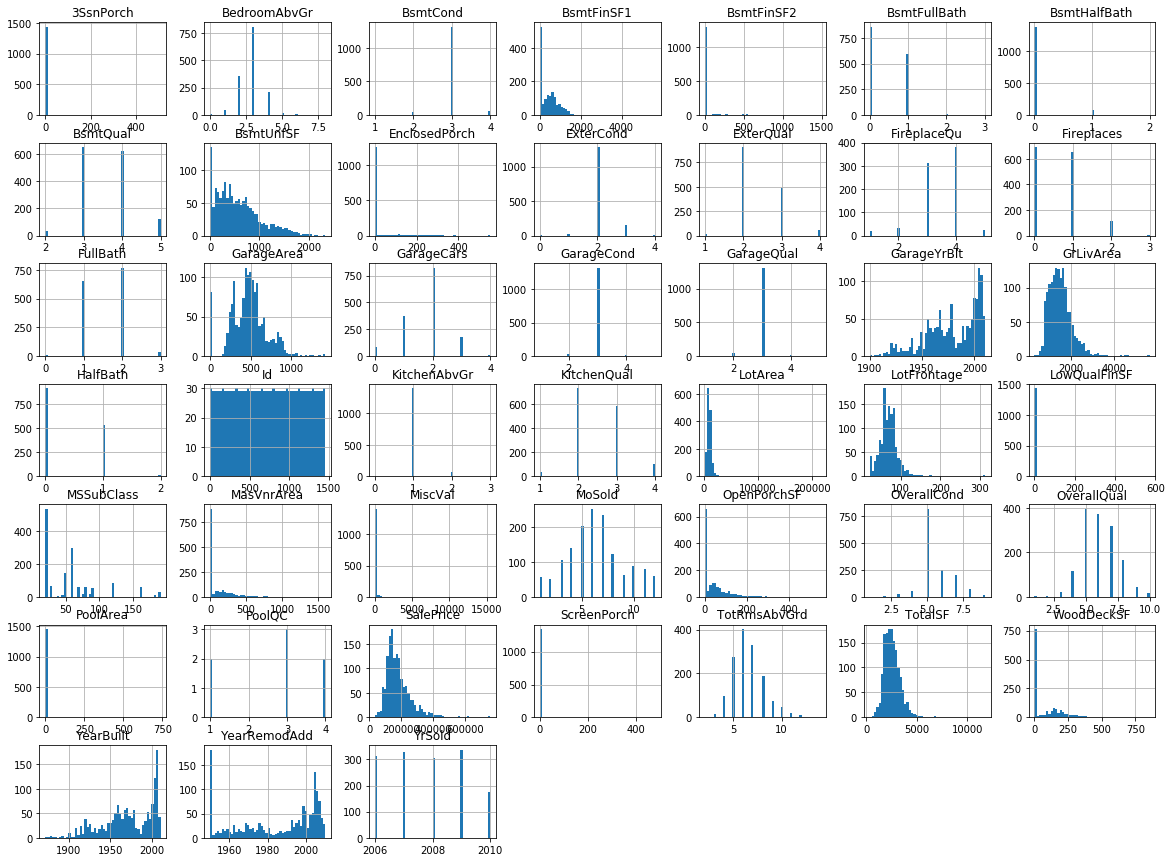

In [9]:
train.hist(bins=50, figsize=(20,15))

<p><a name="Sort"></a></p>

# Sort Features Into Continuous, Nominal, and Ordinal

In [5]:
# Make a list of all the types of variables in the data set.   
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
              'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']

nominal = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
           'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
           'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
           'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical', 
           'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']

ordinal = ['LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
           'BsmtCond', 'BsmtExposure', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
           'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
           'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
           'MoSold']

<p><a name="N"></a></p>

# Notes

We noticed there are a lot of missing values in the Pool, Fence, MiscFeature, and Alley. These might be due to these houses might not have those features, so we could impute a string or number instead of a NA.

- LotFrontage: ??? Side note: Fill in with KNN of LotArea of similar value
- Alley: There is an option NA in the original category. NaN == No Alley Access
- MasVnrType: Masonry Venear Type. Only 8, NaN != None choice in Nominal Catergory. Skip for now.
- MasVnrType: Same as above
- BsmtQual: No basement

In [13]:
sum_missing_values = np.sum(train.isnull())
sum_missing_values[sum_missing_values>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
train[train['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500


In [6]:
train[train['LotArea']>10000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000


<p><a name="Replace"></a></p>

# Replacing Strings With Integers

In [6]:
train['ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace = True)

In [16]:
train['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace = True)
train['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po', 'NA'],[5,4,3,2,1,0],inplace = True)
train['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [8]:
train['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace = True)
train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)
train['GarageQual'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)
train['GarageCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)
train['PoolQC'].replace(['Ex','Gd','TA','Fa','NA'],[4,3,2,1,0],inplace = True)

In [9]:
train.corr()['SalePrice'].sort_values(ascending =False)


SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.644019
GarageCars       0.640409
GarageArea       0.623431
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
PoolQC           0.447936
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
OpenPorchSF      0.315856
FireplaceQu      0.295794
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
BsmtCond         0.160658
GarageQual       0.156693
GarageCond       0.125013
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
ExterCond        0.018899
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id          

In [10]:
train = train[['SalePrice','OverallQual','TotalSF','GrLivArea','ExterQual','KitchenQual','GarageCars','GarageArea','BsmtQual','FullBath',
              'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','PoolQC','BsmtFinSF1','LotFrontage',
              'WoodDeckSF','OpenPorchSF','FireplaceQu','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','BsmtCond',
              'GarageQual','GarageCond','ScreenPorch','PoolArea','MoSold','3SsnPorch','ExterCond']]

In [91]:
test = test[['OverallQual','TotalSF','GrLivArea','ExterQual','KitchenQual','GarageCars','GarageArea','BsmtQual','FullBath',
              'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','PoolQC','BsmtFinSF1','LotFrontage',
              'WoodDeckSF','OpenPorchSF','FireplaceQu','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','BsmtCond',
              'GarageQual','GarageCond','ScreenPorch','PoolArea','MoSold','3SsnPorch','ExterCond']]

In [20]:
# See which columns have missing values
np.sum(train.isnull(), axis=0)

SalePrice       0
OverallQual     0
TotalSF         0
GrLivArea       0
ExterQual       0
KitchenQual     0
GarageCars      0
GarageArea      0
BsmtQual        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
PoolQC          0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
FireplaceQu     0
HalfBath        0
LotArea         0
BsmtFullBath    0
BsmtUnfSF       0
BedroomAbvGr    0
BsmtCond        0
GarageQual      0
GarageCond      0
ScreenPorch     0
PoolArea        0
MoSold          0
3SsnPorch       0
ExterCond       0
dtype: int64

In [97]:
test['TotalSF'].interpolate('linear', inplace = True)
test['GarageArea'].interpolate('linear', inplace = True)
test['BsmtFinSF1'].interpolate('linear', inplace = True)
test['BsmtFullBath'].interpolate('linear',inplace = True)
test['BsmtUnfSF'].interpolate('linear', inplace = True)

In [13]:
# Fix the NaN in the features I've selected
train['BsmtCond'].interpolate('linear', inplace = True)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['PoolQC'] = train['PoolQC'].fillna(0)
train['LotFrontage'] = train['LotFrontage'].fillna(0)
train['FireplaceQu'] = train['FireplaceQu'].fillna(0)
train['BsmtCond'].interpolate('linear', inplace = True)
train['GarageQual'] = train['BsmtQual'].fillna(0)
train['GarageCond'].interpolate('linear', inplace = True)

In [93]:
test['BsmtCond'].interpolate('linear', inplace = True)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['PoolQC'] = test['PoolQC'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(0)
test['FireplaceQu'] = test['FireplaceQu'].fillna(0)
test['BsmtCond'].interpolate('linear', inplace = True)
test['GarageQual'] = test['BsmtQual'].fillna(0)
test['GarageCond'].interpolate('linear', inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is se

In [15]:
train['MasVnrArea'].interpolate('linear', inplace = True)

In [94]:
test['MasVnrArea'].interpolate('linear', inplace = True)

<p><a name="Focus"></a></p>

## What to focus on
- OverallQual
- TotalSF    
- GrLivArea  
- ExterQual  
- KitchenQual
- BsmtQual   
- GarageCars 
- GarageArea 
- FullBath   
- TotRmsAbvGrd
- YearBuilt   
- YearRemodAdd

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data




X = train.drop(['SalePrice'], axis = 1)
Y = train['SalePrice']
# feature extraction
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print(fit.n_features_)
print('-'*50)
print(fit.support_)
print('-'*50)
print(fit.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

17
--------------------------------------------------
[ True False False  True  True  True False  True  True  True False False
 False False  True False False False False False  True  True False  True
 False  True  True  True  True False False  True False  True]
--------------------------------------------------
[ 1 16 13  1  1  1 11  1  1  1  3  2 10  7  1  4  9  6  8  5  1  1 18  1
 12  1  1  1  1 14 15  1 17  1]


In [144]:
trip = train[['OverallQual','ExterQual','KitchenQual','GarageCars','BsmtQual','FullBath','TotRmsAbvGrd','Fireplaces',
      'FireplaceQu','HalfBath','BsmtFullBath','BedroomAbvGr','BsmtCond','GarageQual','ExterCond','MoSold',
      'GarageCond','TotalSF']]

In [145]:
test_trip = test[['OverallQual','ExterQual','KitchenQual','GarageCars','BsmtQual','FullBath','TotRmsAbvGrd','Fireplaces',
      'FireplaceQu','HalfBath','BsmtFullBath','BedroomAbvGr','BsmtCond','GarageQual','ExterCond','MoSold',
      'GarageCond','TotalSF']]

In [72]:
np.sum(test_trip.isnull(), axis=0)

OverallQual     0
ExterQual       0
KitchenQual     0
GarageCars      0
BsmtQual        0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
HalfBath        0
BsmtFullBath    0
BedroomAbvGr    0
BsmtCond        0
GarageQual      0
ExterCond       0
MoSold          0
GarageCond      0
dtype: int64

In [71]:
test_trip['GarageCars'] = test_trip['GarageCars'].fillna(0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
test_trip['KitchenQual'].interpolate('linear',inplace = True)
test_trip['GarageCars'].interpolate('linear', inpalce = True)
test_trip['FireplaceQu'] = test['FireplaceQu'].fillna(0)
test_trip['BsmtFullBath'].interpolate('linear', inplace = True)
test_trip['BsmtCond'].interpolate('linear', inplace = True)
test_trip['GarageQual'].interpolate('linear', inplace = True)
test_trip['GarageCond'].interpolate('linear', inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<p><a name="MLR"></a></p>

## Train Multiple Linear Regression

In [148]:
#separating independent and dependent variable
x = trip.drop(['Fireplaces','MoSold','TotalSF'], axis = 1)
y = np.log(train['SalePrice'])



#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## fitting the model and then making a prediction
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

#test_x = test[['OverallQual','TotalSF','GrLivArea','ExterQual','KitchenQual','GarageCars','YearBuilt','YearRemodAdd','BsmtQual']]

# Predicting the Test set results
#model.predict(x_test)
print('-'*50)
print('R-Squared test score:%f' %(model.score(x_test,y_test)))
print('-'*50)
print('R-Squared train score:%f' %(model.score(x_train, y_train)))
#well = model.predict(test_trip.drop(['Fireplaces'], axis = 1))

--------------------------------------------------
R-Squared test score:0.819083
--------------------------------------------------
R-Squared train score:0.819763


In [101]:
well = np.exp(well)

## Running A Ridge, Lasso, ElasticNet Regression

In [30]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
x = trip
y = train['SalePrice']

reg.fit(x,y)

reg.alpha_

10.0

In [31]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 10.0)
ridge.fit(x,y)
ridge.score(x,y)

0.7707744200782816

In [123]:
alpha_100 = np.logspace(0, 8, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(x, y)
    coef.append(ridge.coef_)

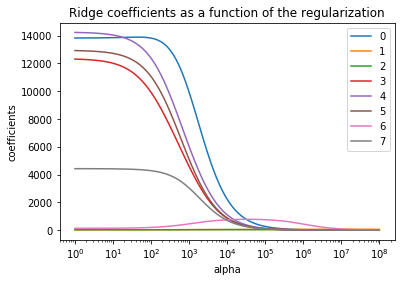

In [125]:
df_coef = pd.DataFrame(coef, index=alpha_100)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

In [126]:
x = trip
y = train['SalePrice']



#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## fitting the model and then making a prediction
#from sklearn.linear_model import Ridge
model = Lasso(alpha= 0.1,normalize = True)
model.fit(x_train, y_train)

#test_x = test
# Predicting the Test set results
#model.predict(x_test)
print('R-Squared Train Score:%f' %(model.score(x_train,y_train)))
print('-'*30)
print('R-Squared Test Score:%f' %(model.score(x_test,y_test)))
print('-'*30)
#model.predict(test_x)

R-Squared Train Score:0.781675
------------------------------
R-Squared Test Score:0.745073
------------------------------


In [87]:
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

X = trip   # input variable
Y = train['SalePrice'] 

lasso.set_params(alpha=10)
lasso.fit(X, Y)
lasso.score(X, Y)

0.7708107186654272

In [71]:
print("Predicted sales: %f" %(ridge.predict([[6,3000,2002]])))

Predicted sales: 208577.061977


## Decision Tree Classification

In [36]:
train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,3,2,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,3,2,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,3,2,...,0,0,0,0,1,0,0,0,1,0


In [33]:
train.drop('LandSlope', axis = 1, inplace = True)

# Random Forest

In [68]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

In [80]:
x = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

randomForest.fit(x,y)

randomForest.score(x,y)

0.9952054794520548

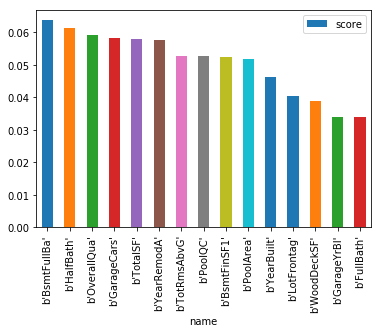

In [79]:
feature_importance = list(zip(train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

# Gradient Boost Regressor

In [121]:
gbm = GradientBoostingRegressor()

x = trip
y = train['SalePrice']



X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3)

gbm.set_params(learning_rate=0.01, n_estimators=500, verbose=1, subsample=0.7, warm_start=False, loss='ls', max_depth=2, max_features=2, min_impurity_decrease=0.01)



gbm.fit(X_train,Y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, Y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,Y_test)))
print('-'*50)
tip = gbm.predict(test_trip)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1  5643991264.4900    37448147.3089            0.40s
         2  5860826105.0179    60454570.4464            0.40s
         3  5929548646.6260    52001433.2108            0.37s
         4  6182515828.0076    52067850.8964            0.35s
         5  5824060459.6183    63509015.9401            0.34s
         6  5727524783.1676    32270859.5893            0.33s
         7  5456467697.2463    62572178.6948            0.34s
         8  5114822855.1071    51573653.3446            0.37s
         9  5084154516.6490    53852400.5127            0.39s
        10  5190070711.9002    28925187.9385            0.39s
        20  4921586454.9881    42919749.9420            0.29s
        30  4660333490.0807    31818634.6936            0.25s
        40  4071084938.8212    37709398.0457            0.23s
        50  3941622556.8819    15725317.3691            0.21s
        60  3411000702.0254    22720685.9917            0.20s
       

## Features with >50% correlation Prior to 

* OverallQual
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* FullBath
* TotRmsAbovGrd
* GarageCars
* GarageArea

<p><a name="Turn"></a></p>

## Turning Categorical Values into Dummy Values **If Needed**


In [64]:
# Only if needed. Don't use immediately
for variable in nominal:
    dummy = pd.get_dummies(train[variable], prefix=variable, prefix_sep='_')
    dummy.drop(list(dummy.columns)[0], axis=1, inplace=True) #Drop 1st dummy is the dominant category
    train.drop(variable, axis=1, inplace=True) #Drop original categorical column
    train = pd.concat([train, dummy], axis=1) #concat train with dummy dataframes

KeyError: 'MSSubClass'

<p><a name="Test"></a></p>

# Test Set

In [43]:
# Load the test data set and create a new column
test = pd.read_csv('test.csv')
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [48]:
np.sum(test.isnull(), axis= 0)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive

In [44]:
# See which columns have missing values
np.sum(test.isnull(), axis=0)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive

In [45]:
test.drop('TotalBsmtSF', axis = 1, inplace = True)
test.drop('1stFlrSF', axis = 1, inplace = True)
test.drop('2ndFlrSF', axis = 1, inplace = True)

In [49]:
test['ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace = True)
test['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace = True)
test['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po', 'NA'],[5,4,3,2,1,0],inplace = True)
test['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)
test['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace = True)
test['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)
test['GarageQual'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)
test['GarageCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0],inplace = True)
test['PoolQC'].replace(['Ex','Gd','TA','Fa','NA'],[4,3,2,1,0],inplace = True)
test['BsmtQual'] = test['BsmtQual'].fillna(0)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [ ]:
test_x = test[['OverallQual','TotalSF','GrLivArea','ExterQual','KitchenQual','GarageCars','YearBuilt','YearRemodAdd']]


<p><a name="Testing"></a></p>

# Testing MLR

In [89]:
test['KitchenQual'].interpolate(method = 'linear', inplace = True)
test['GarageCars'].interpolate(method = 'linear', inplace = True)

In [105]:
#separating independent and dependent variable
x = train[['OverallQual','TotalSF','ExterQual','KitchenQual','YearBuilt','YearRemodAdd', 'BsmtQual', 'BsmtCond']]
y = train['SalePrice']



#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## fitting the model and then making a prediction
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

#test_x = test[['OverallQual','TotalSF','GrLivArea','ExterQual','KitchenQual','GarageCars','YearBuilt','YearRemodAdd','BsmtQual']]

# Predicting the Test set results
#model.predict(x_test)
print('R-Squared Train Score:%f' %(model.score(x_train,y_train)))
print('-'*50)
print('R-Squared Test Score:%f' %(model.score(x_test,y_test)))
print('-'*50)
#pred = model.predict(test_x)

R-Squared Train Score:0.797405
--------------------------------------------------
R-Squared Test Score:0.702341
--------------------------------------------------


In [102]:
well = pd.DataFrame(well)

In [119]:
rid.to_csv('prediction4.csv')

In [108]:
ID = pd.DataFrame(test['Id'])

In [113]:
rid = pd.concat([ID,well],axis = 1)

In [110]:
well = well.rename(columns = {0: 'SalePrice'})

In [117]:
rid.set_index('Id', inplace = True)

In [118]:
rid

,SalePrice
Id,
1461,103984.466515
1462,132328.157296
1463,147305.574005
1464,182714.097312
1465,181005.379783
1466,168172.198566
1467,169473.017099
1468,172995.954266
1469,176194.465068
